# Telecom Churn Prediction Model

## Project Life Cycle
1. Understand Problem Statement
2. Data Collection
3. Data Checks and validation
4. Exploratory Data Analysis (EDA)
5. Data Pre-processing
6. Model Training & Testing
7. Model Evaluation - Choosing the best model

## 1. Understand the Problem Statement: 
-> *What is churn?* Churn occurs when a customer stops using the company's services and leaves for another provider.
This is bad for the company because acquiring new customers is often more expensive than keeping existing ones.


*Goal*:
This project involves identifying patterns and factors contributing to customer churn and building a predictive model
to help the telecom company retain customers.
Understand the relationships between factors and churn to better;

i.  Predict if a customer is likely to churn.


ii. Identify what factors contribute to churn so the company can take action to reduce it.

## 2. Data Collection:
-> *Data Source* : [Source](https://www.kaggle.com/royjafari/customer-churn) for data  and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description.


-> The data consist of 14 columns and 3150 rows [see data_dict.md file]

### 2.1. Install Packages and Import Necessary Libraries



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
import math
from scipy.stats import mannwhitneyu, chi2_contingency, ttest_ind

### 2.2. Import Data

In [48]:
df = pd.read_csv('data/customer_churn.csv')

take a look into the data

In [49]:

df.shape

(3150, 14)

In [50]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


## 3. Data Validation - Quality checks:

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Derived Features


### 3.1. Check for Missing values

In [51]:
df.isna().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

No null records present in the data set.

### 3.2  Duplicates:


In [52]:
df.duplicated().sum()

300

There are about 300 duplicate records(row records)

In [53]:
# drop duplicates

df.drop_duplicates(inplace=True)  # Modifies the original DataFrame directly


In [54]:
df.shape

(2850, 14)

### 3.3. Check Data Types

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             2850 non-null   int64  
 1   Complaints               2850 non-null   int64  
 2   Subscription Length      2850 non-null   int64  
 3   Charge Amount            2850 non-null   int64  
 4   Seconds of Use           2850 non-null   int64  
 5   Frequency of use         2850 non-null   int64  
 6   Frequency of SMS         2850 non-null   int64  
 7   Distinct Called Numbers  2850 non-null   int64  
 8   Age Group                2850 non-null   int64  
 9   Tariff Plan              2850 non-null   int64  
 10  Status                   2850 non-null   int64  
 11  Age                      2850 non-null   int64  
 12  Customer Value           2850 non-null   float64
 13  Churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)
memo

The df carries the right Dtypes for each column.

Based of the data dictionaries weve noticed some ordinated categorial attributes,

Complaints, charge amount, Age Group, Tariff Plan, Status and Churn. 

### 3.4. Check count of  Unique Values

In [56]:
df.nunique()

Call Failure                 37
Complaints                    2
Subscription Length          45
Charge Amount                11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

### 3.5. Data Stats 

In [57]:
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,0.080702,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,2.835088,1.080351,1.240000,31.077193,474.990367,0.156491
std,7.326172,0.272424,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,0.893503,0.271883,0.427158,8.861934,514.442198,0.363384
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,2.000000,1.000000,1.000000,25.000000,117.527500,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,3.000000,1.000000,1.000000,30.000000,232.520000,0.000000
75%,12.000000,0.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,3.000000,1.000000,1.000000,30.000000,790.080000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


#### Insights 
1. Low Churn: Only approximately 16% of customers leave, and most stay for a long time (average: 32 months). This shows good customer loyalty.

2. Big Differences in Usage: Some customers use the service a lot (up to 17,090 calls), while others barely use it. SMS use also varies widely.

3. Customer Value Concentration: A few customers have a higher Customer Value (highest value: 2165), while half contribute less than 233.

4. Few Complaints, Many Call Failures: Complaints are rare (only 8%), but call failures are common (average: 7.8). These failures might affect satisfaction.

5. Missed Revenue: Many customers are in the lowest ordinal charge group charged (median charges: 0)

without knowing the statistical relationships or the context behind the attributes, we can only make general observations, not firm conclusions.

### 3.6. Derived Features 

transforming existing features to gain more insights on the interaction of churn attribute.


In [58]:
# Group by age group and calculate churn rate for each group, make that an attribute

# create a copy of df
feature = df.copy()

# create churn rate by age group attribute: This tells  whether a customer's age group has a strong influence on their likelihood to churn.
feature['Age Group Churn Rate'] = feature.groupby('Age Group')['Churn'].transform('mean').round(2)

# create churn rate by charge amount attribute

feature['Charge Amount Churn Rate'] = feature.groupby('Charge Amount')['Churn'].transform('mean').round(2)

# create churn rate by tariff plan attribute

feature['Tariff Plan Churn Rate'] = feature.groupby('Tariff Plan')['Churn'].transform('mean').round(2)

# create call efficiency metric
feature['Call Efficiency'] = (feature['Seconds of Use'] / feature['Frequency of use']).round(3)

feature.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Age Group Churn Rate,Charge Amount Churn Rate,Tariff Plan Churn Rate,Call Efficiency
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,0.16,0.24,0.17,61.549
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,0.17,0.24,0.17,63.600
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,0.16,0.24,0.17,40.883
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,0.00,0.24,0.17,63.606
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,0.00,0.24,0.17,41.259


In [59]:
# Display the unique age groups with their corresponding churn rates and sort by churn rate
churn_rate_table = feature[['Age Group', 'Age Group Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table = churn_rate_table.sort_values(by='Age Group Churn Rate', ascending=False)
print(churn_rate_table)


   Age Group  Age Group Churn Rate
3          4                  0.20
1          2                  0.17
0          3                  0.16
4          5                  0.01
2          1                  0.00


In [60]:
churn_rate_table2 = feature[['Tariff Plan', 'Tariff Plan Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table2 = churn_rate_table2.sort_values(by='Tariff Plan Churn Rate', ascending=False)
print(churn_rate_table2)

   Tariff Plan  Tariff Plan Churn Rate
0            1                    0.17
1            2                    0.03


In [61]:
churn_rate_table3 = feature[['Charge Amount', 'Charge Amount Churn Rate']].drop_duplicates().reset_index(drop=True)
churn_rate_table3 = churn_rate_table3.sort_values(by='Charge Amount Churn Rate', ascending=False)
print(churn_rate_table3)

    Charge Amount  Charge Amount Churn Rate
0               0                      0.24
1               1                      0.08
2               2                      0.06
3               3                      0.04
5               4                      0.01
4               8                      0.00
6               9                      0.00
7               7                      0.00
8               5                      0.00
9              10                      0.00
10              6                      0.00



#### Insights

1. The majority of the group has a higher churn rate and group 4 has the highest churn rate, indicating a potential area for customer retention focus.

2. Tariff Plan 1 shows a significantly higher churn rate compared to Tariff Plan 2 (contractual), suggesting dissatisfaction with Plan 1(Pay as you go).

3. Charge Amounts correlate with churn rates, where higher charges rank (e.g., 4, 6, 7, 8, 9, 10) are linked to lower churn, while lower charges rank (0, 1, 2) have higher churn rates.

## 4. Exploratory Data Analysis ( With Visualizations)

1. Distribution Plots - Target and Determinants
2. Handling Skewed Distribution in Numerical Attributes
3. Statistical Tests to Analysis Factors Relationships/ correlation to Churn
4. Outliers Detection

(EDA) is all about analyzing and visualizing data to uncover patterns, spot anomalies, test hypotheses, and summarize key statistics.

Target attribute is Churn. We will be exploring all dependent attributes against churn. to understand their relationships, and all that was stated above.


In [62]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Failure              2850 non-null   int64  
 1   Complaints                2850 non-null   int64  
 2   Subscription Length       2850 non-null   int64  
 3   Charge Amount             2850 non-null   int64  
 4   Seconds of Use            2850 non-null   int64  
 5   Frequency of use          2850 non-null   int64  
 6   Frequency of SMS          2850 non-null   int64  
 7   Distinct Called Numbers   2850 non-null   int64  
 8   Age Group                 2850 non-null   int64  
 9   Tariff Plan               2850 non-null   int64  
 10  Status                    2850 non-null   int64  
 11  Age                       2850 non-null   int64  
 12  Customer Value            2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Age Group Chu

### 4.1 Distribution Plots : Understanding skewness and the need for normalization, interactive terms or polynomial feature.

### Target Variable (Churn) Analysis:

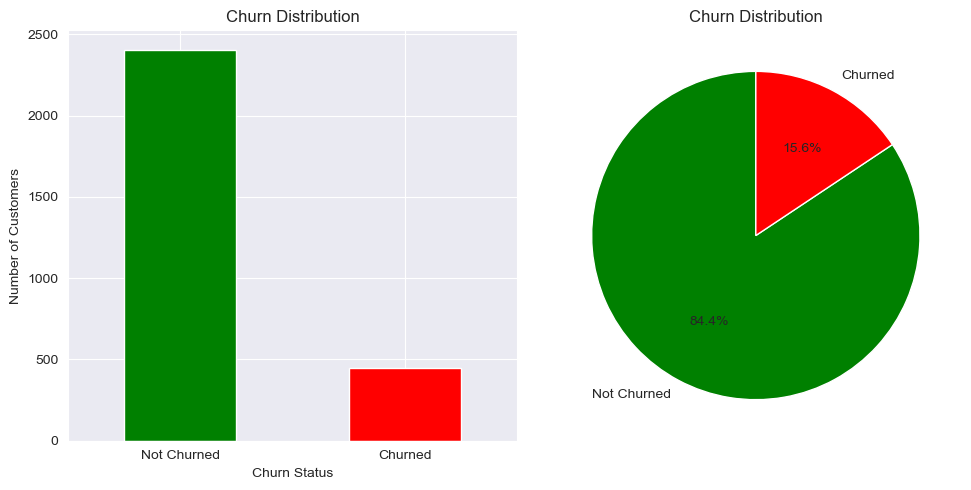

In [63]:
churn_counts = feature['Churn'].value_counts()
# Rename the indices
churn_counts.index = ['Not Churned', 'Churned']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Bar Plot on the first subplot (ax1)
churn_counts.plot(kind='bar', color=['green', 'red'], title="Churn Distribution", ax=ax1)
ax1.set_xlabel("Churn Status")
ax1.set_ylabel("Number of Customers")
ax1.tick_params(axis='x', rotation=0)


# Pie Chart on the second subplot (ax2)
ax2.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
ax2.set_title("Churn Distribution")

# Display the subplots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Insight
The analysis reveals that churned customers represent only 15.6% of the total customer base, while 84.4% of customers remain active. This indicates that the majority of customers are retained, which is a positive outcome for the business. However, the 15.6% churn rate still represents a significant loss of revenue and highlights the need to investigate the underlying causes of churn. By identifying the key factors driving customer attrition and implementing targeted retention strategies, the business can further reduce churn and improve customer loyalty.


### Determinant Analysis 


### Uni-variate Analysis for each Numerical Attributes 

In [64]:
# List of numerical attributes (excluding 'Churn' and other ordinal attributes)
numerical_vars = feature.columns.drop(['Churn', 'Complaints', 'Charge Amount', 'Tariff Plan', 'Status', 'Age Group'])


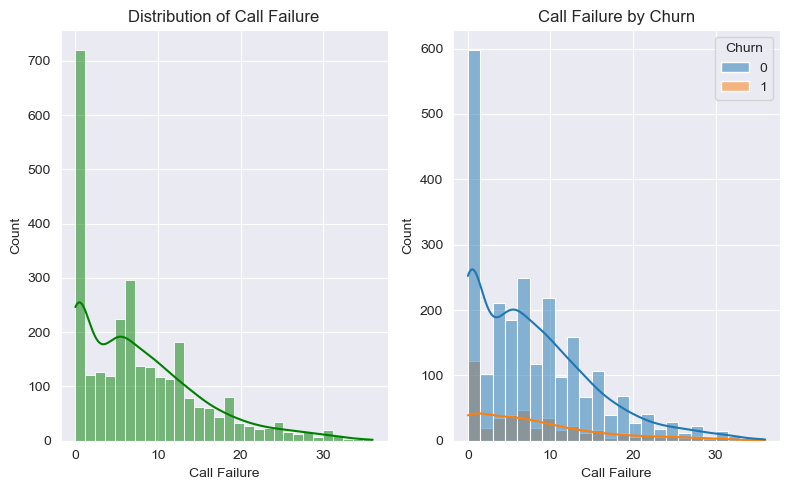

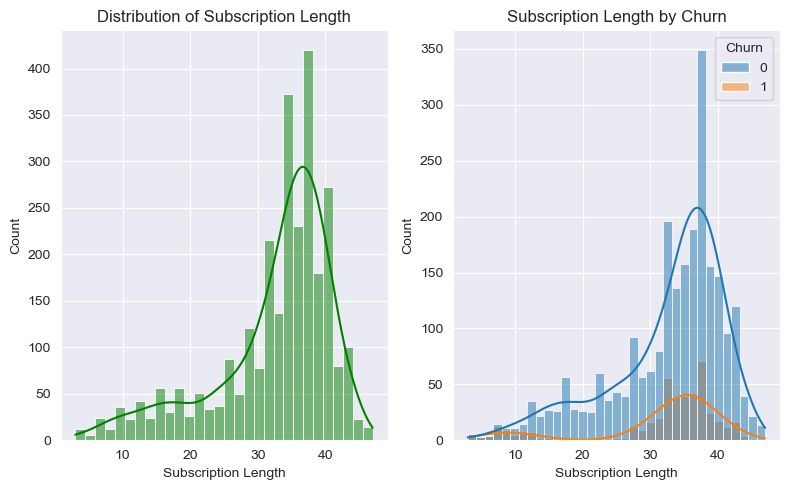

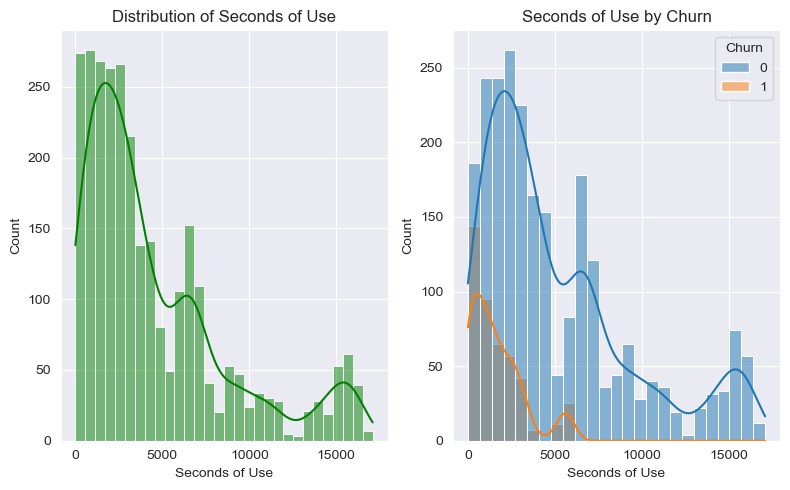

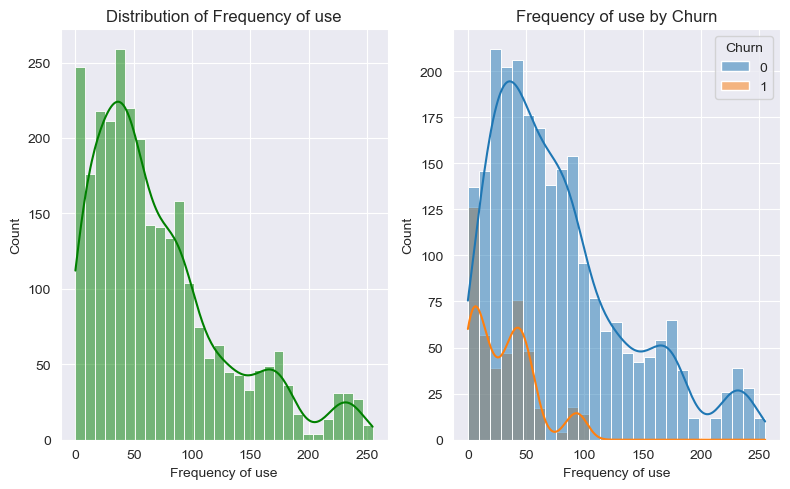

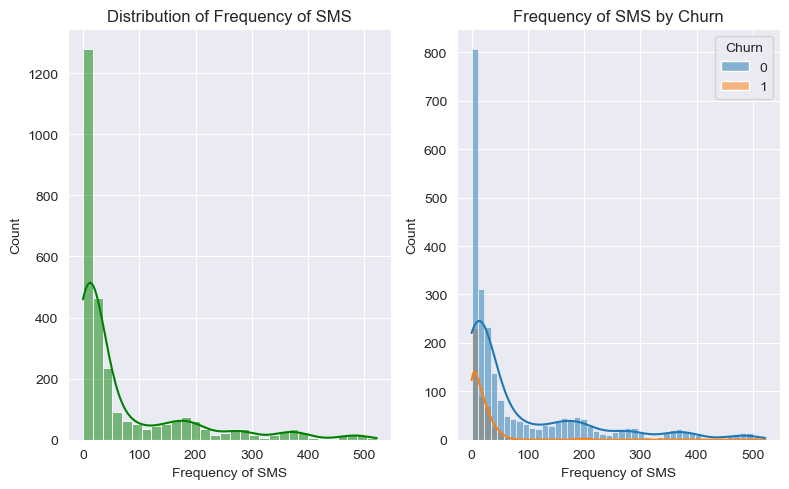

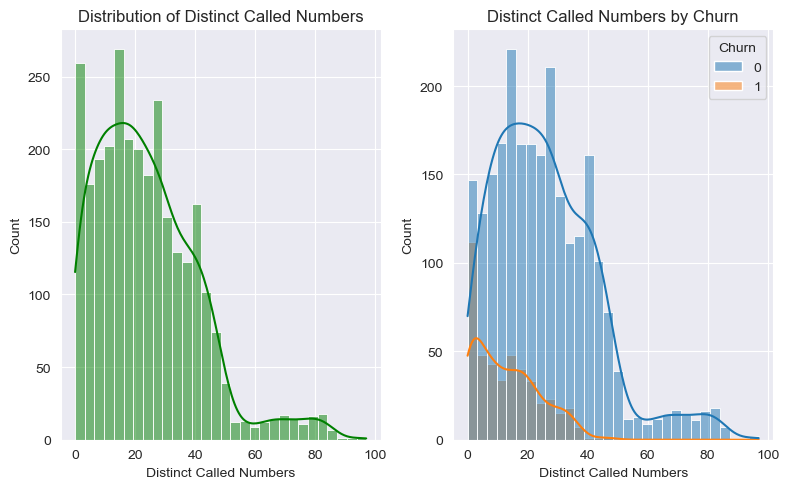

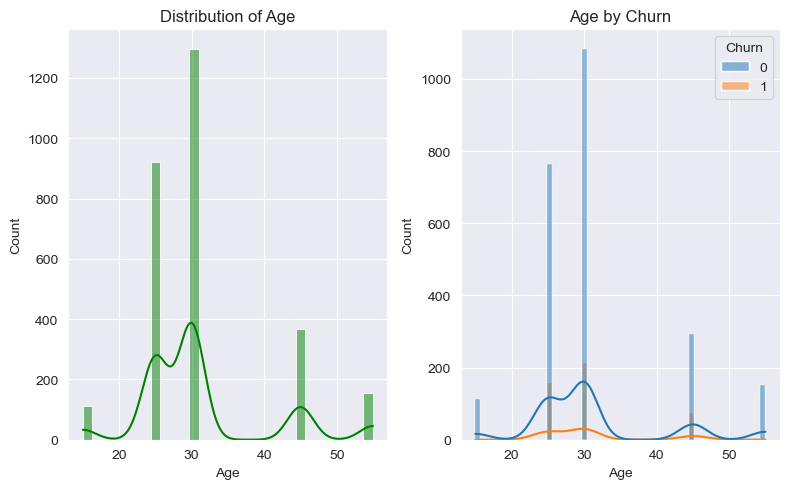

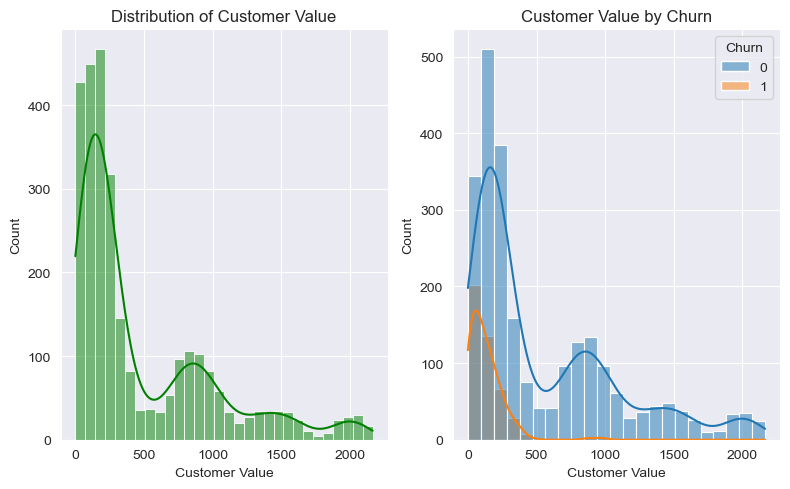

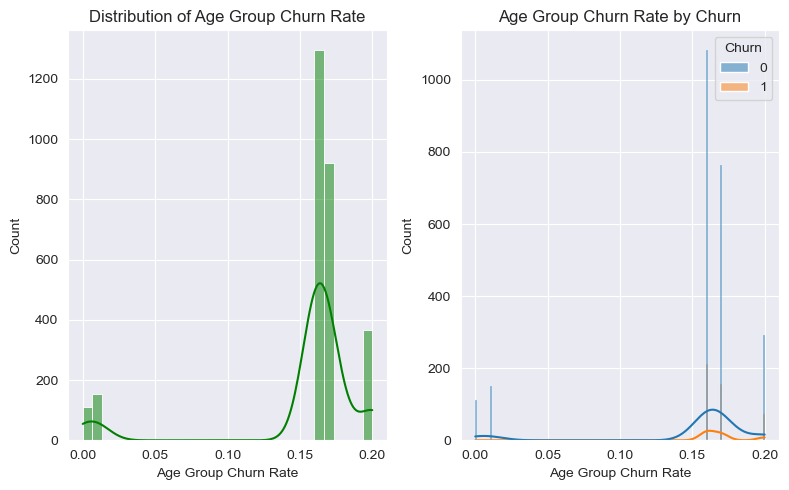

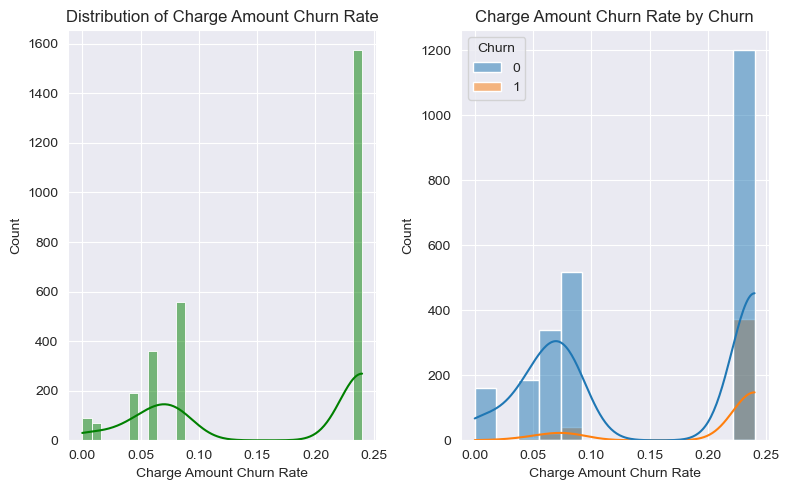

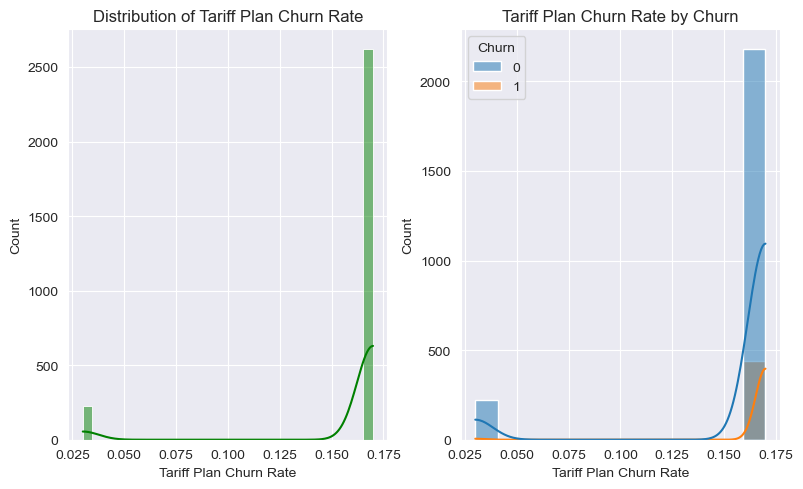

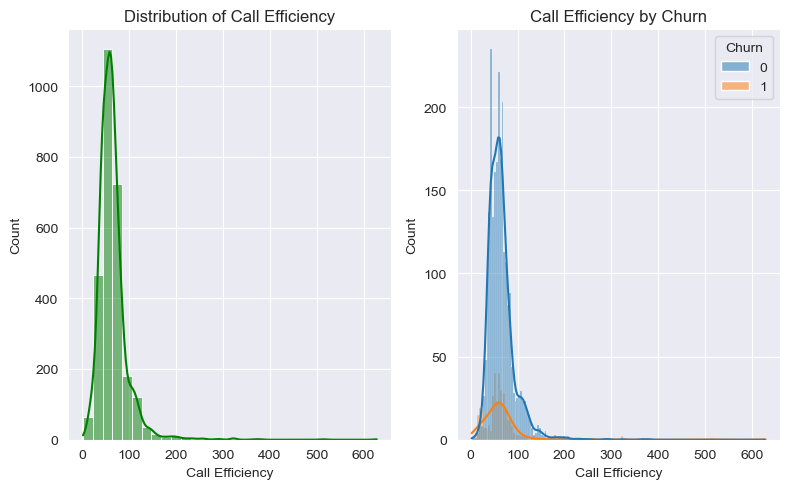

In [65]:
for var in numerical_vars:
    fig, axs = plt.subplots(1, 2, figsize=(8, 5))

    # First subplot: Histogram with KDE
    plt.subplot(121)
    sns.histplot(data=feature, x=var, bins=30, kde=True, color='g')  # Replace 'df' with your DataFrame
    plt.title(f'Distribution of {var}')

    # Second subplot: Histogram with KDE and hue for 'Churn'
    plt.subplot(122)
    sns.histplot(data=feature, x=var, kde=True, hue='Churn')  # Replace 'df' with your DataFrame
    plt.title(f'{var} by Churn')

    plt.tight_layout()
    plt.show()

#### Call Failure

1. Call Failure Distribution: Most customers experience no call failures, with churned customers showing a smaller distribution and fewer high call failures.

2. Customer Behavior: Non-churned customers tend to have no call failures, while churned customers generally have fewer failures, suggesting that call issues alone aren't the main churn driver.

3. Actionable Insight: Improving call quality for customers with more failures might help reduce churn, but other factors likely contribute to churn as well.

#### Subscription Length

1. Subscription Length Distribution: The highest frequency of customers is around the 50-month mark, with a significant peak in the 30-40 month range for both churned and non-churned customers.

2. Customer Behavior: Both churned and non-churned customers show a similar peak around the 30-40 month range, indicating that subscription length doesn't seem to be a strong differentiator between churned and non-churned customers.

3. Actionable Insight: Since the subscription length peak is shared by both groups, focusing on other factors beyond just subscription duration may be more effective for reducing churn.

#### Second of Use

1. Seconds of Use Distribution: Most customers fall within the 0 to approximately 7,000 seconds range, with usage decreasing significantly.

2. Customer Behavior: Churned customers are mainly within the 0 to just over 5,000 seconds range, after which the distribution drops to zero, showing a stronger decline in usage among churned customers.

3. Actionable Insight: Targeting customers with moderate usage (0-5,000 seconds) for retention efforts could be key, as the sharp drop in usage might indicate disengagement that leads to churn.




 #### Frequency of USe
 
1. Frequency of Use Distribution: Most customers have a frequency of use between 0 and 100 calls, with a noticeable drop as the number of calls increases.

2. Customer Behavior: Churned customers also show a peak in the 0 to 100 range, after which the frequency of calls drops to zero, indicating a sharp decline in usage among churned customers.

3. Actionable Insight: Focusing on customers with low to moderate call frequencies (0-100 calls) could help prevent churn, as these customers may be at risk of disengagement. 

#### Frequency of SMS 

1. Frequency of SMS Distribution: The majority of customers fall within the 0 to 100 SMS range, with the distribution sharply declining beyond 500 SMS.

2. Customer Behavior: Churned customers are concentrated within the 0 to 90 SMS range, after which the frequency drops to zero, showing that churned customers tend to send fewer SMS messages.

3. Actionable Insight: Engaging customers who send fewer SMS messages (0-90) may help prevent churn, as these customers exhibit lower usage, potentially signaling reduced engagement.

#### Distinct call numbers 
1. Distinct Called Numbers Distribution: Most customers have between 0 and 60 distinct called numbers.

2. Customer Behavior: Churned customers are mostly concentrated around 0 distinct called numbers, with a quarter of them having up to 40 distinct numbers before the distribution drops to zero.

3. Actionable Insight: Targeting customers with limited distinct called numbers (0-40) could help reduce churn, as these customers might be disengaging or experiencing reduced usage.

#### Age :

1. Customer Behavior: Churn is more prevalent among customers around 30 years old, while older and younger age groups show significantly fewer churned customers, suggesting that churn is concentrated in this specific age group.

2. Actionable Insight: Focusing retention efforts on customers around 30 years old could be key, as this group shows the highest churn rates compared to other age segments.

#### Customer Value 

1. Customer Value Distribution: Most customers have a customer value between 0 and 500, with a slight rise in the 1,000 range and a smaller presence in the 2,000 range.

2. Customer Behavior: Churned customers are predominantly in the 0 to 500 range, with most churn occurring at a customer value of 0, indicating that low-value customers are more likely to churn.

3. Actionable Insight: Targeting low-value customers (0-500) for retention could help reduce churn, especially those with a customer value of 0, as they are most at risk.


#### Call Efficiency

1. Call Efficiency Distribution: Call efficiency is a feature derived from dividing the total seconds of use by the frequency of use, which reflects how efficiently a customer uses their available call time. Most customers fall within a range of 0 to 200 seconds/call, meaning they use a relatively low amount of time per call in relation to how often they make calls. A few outliers stretch the range up to 600, indicating some customers use much more time per call compared to their frequency.

2. Customer Behavior: Churned customers show a concentration between 0 and 100 for call efficiency, suggesting that customers who don’t optimize their call time may be disengaging, either due to dissatisfaction with the service or lack of deeper usage. These customers might not see the value in making efficient use of their subscriptions.

3. Actionable Insight: For a retention strategy, focus on customers with low call efficiency (0-100). You could consider offering tutorials, tips, or optimizing plans that encourage these customers to use their service more effectively, which could increase engagement and reduce churn.

In [66]:
print(f"the max call efficiency is {feature['Call Efficiency'].max()} seconds per call")

the max call efficiency is 628.0 seconds per call


### Uni-variate Analysis for each Ordinal and Binary Attributes 

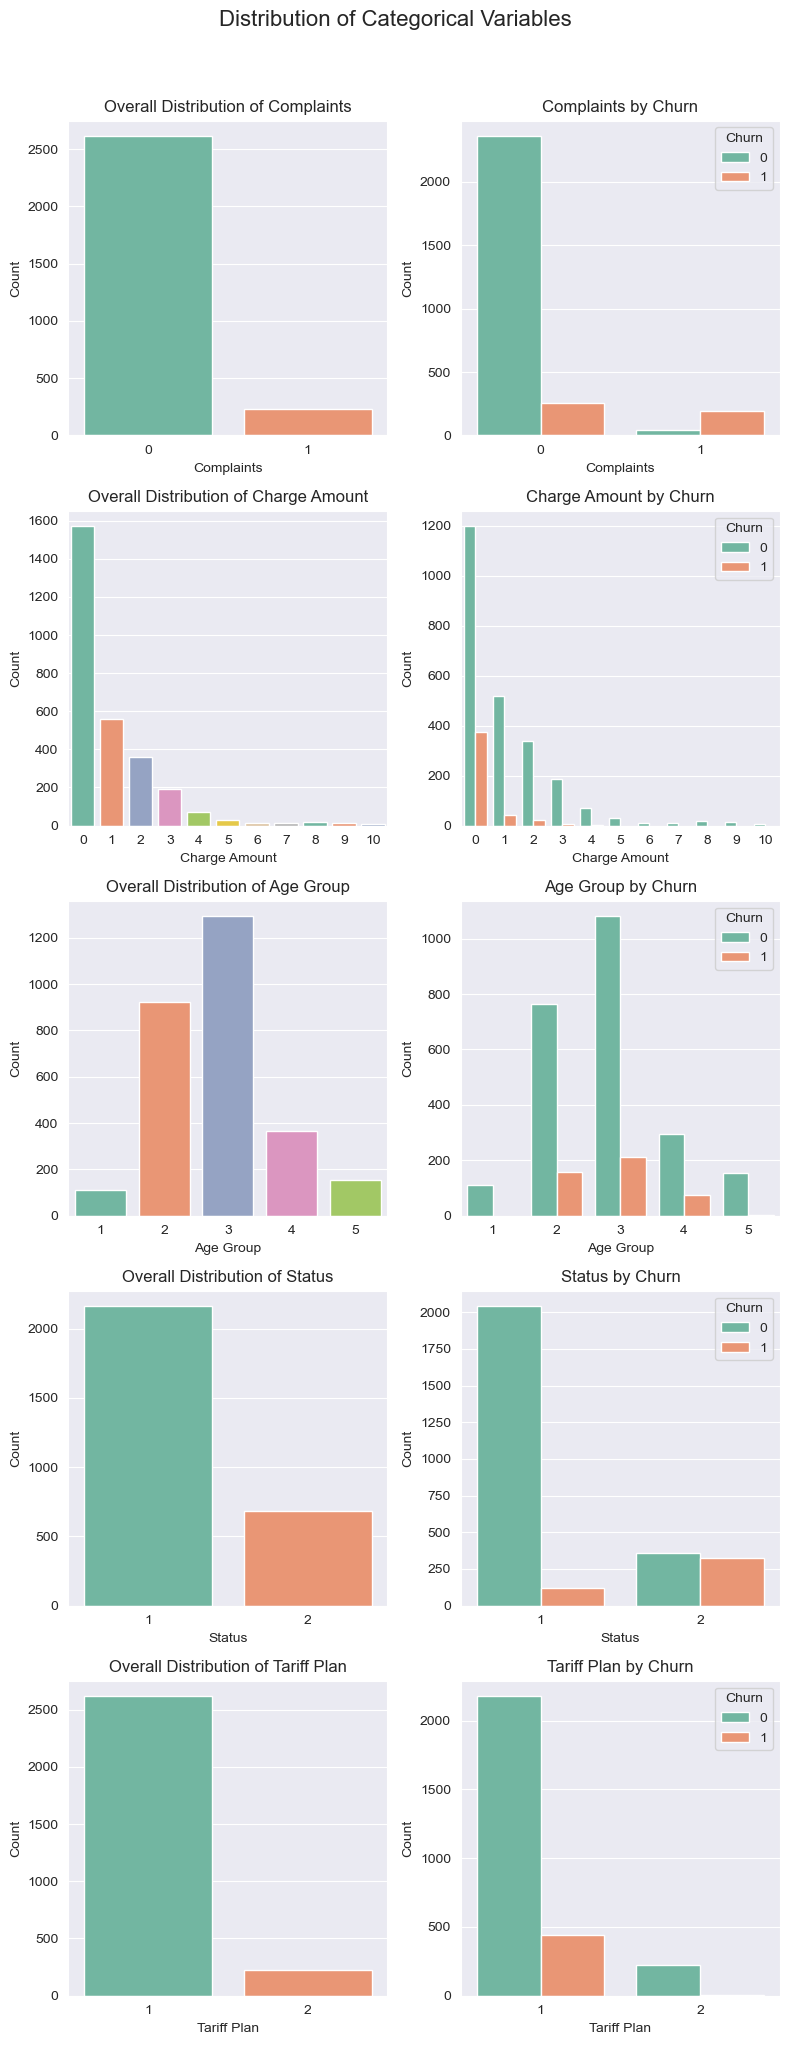

In [67]:
# List of categorical variables
categorical_vars = ['Complaints', 'Charge Amount', 'Age Group', 'Status', 'Tariff Plan']  # Categorical variables

# Set up the subplot grid
n_cols = 2  # Number of columns (one for normal, one for churn vs non-churn)
n_rows = len(categorical_vars)  # Number of rows, one for each categorical variable

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 4))  #figsize
fig.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)

# Loop through each categorical variable and plot in the corresponding subplot
for i, var in enumerate(categorical_vars):
    # First subplot: Overall distribution of the variable
    sns.countplot(data=feature, x=var, palette='Set2', ax=axes[i, 0])
    axes[i, 0].set_title(f'Overall Distribution of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Count')

    # Second subplot: Churn vs Non-Churn distribution of the variable
    sns.countplot(data=feature, x=var, hue='Churn', palette='Set2', ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} by Churn')
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [68]:
# Initialize a dictionary to store counts for each variable
categorical_counts = {}

# Loop through each categorical variable and calculate the counts
for var in categorical_vars:
    overall_count = feature[var].value_counts()  # Count of each category in the variable
    churn_count = feature.groupby('Churn')[var].value_counts()  # Count by Churn status

    # Store the counts in the dictionary
    categorical_counts[var] = {
        'Overall Count': overall_count,
        'Churn Count': churn_count
    }

# Display the counts
for var, counts in categorical_counts.items():
    print(f"--- {var} ---")
    print("Overall Count:\n", counts['Overall Count'])
    print("\nChurn Count:\n", counts['Churn Count'])
    print("\n" + "-"*30 + "\n")


--- Complaints ---
Overall Count:
 Complaints
0    2620
1     230
Name: count, dtype: int64

Churn Count:
 Churn  Complaints
0      0             2364
       1               40
1      0              256
       1              190
Name: count, dtype: int64

------------------------------

--- Charge Amount ---
Overall Count:
 Charge Amount
0     1575
1      559
2      362
3      192
4       70
5       30
8       19
9       13
7       12
6       11
10       7
Name: count, dtype: int64

Churn Count:
 Churn  Charge Amount
0      0                1201
       1                 517
       2                 340
       3                 185
       4                  69
       5                  30
       8                  19
       9                  13
       7                  12
       6                  11
       10                  7
1      0                 374
       1                  42
       2                  22
       3                   7
       4                   1
Name: count, 

#### Complaints
1. Business Impact:
   Complaint rate: 8.1% of customers filed complaints (230 out of 2850).

    High complaint rates correlate strongly with churn; 45% of customers who churned had complaints (190 out of 420 churned).
    
    Addressing complaints proactively can reduce churn and improve customer loyalty.

2. Model Impact:
    Complaints can significantly improve churn prediction models as a strong feature. Customers who complained are 8.5 times more likely to churn.

#### Charge Amount
1. Business Impact:
    The majority (1575 out of 2850) fall within the lowest charge amount (0).

    Churn is more prominent in the lower charge amounts, with 517 churned customers in that group.
   
    Explore personalized charge plans to increase revenue per user without increasing churn.
2. Model Impact:
    Charge amount has moderate predictive power, but lower amounts appear correlated with churn. It helps segment high-value customers for targeted interventions.

####  Age Group
1. Business Impact:
    The 30-year-old segment (1296 out of 2850) has the highest customer base, with 16.5% churn (213 out of 1296).
   
    Older customers (age 5) show lower churn, at just 1.3% (2 churned out of 154).
   
    Focus retention efforts on the 30-40 age group, which is most at risk.
2. Model Impact:

    Age group is a strong feature for churn prediction, especially for middle-aged customers (age 3). It helps target customers with higher churn likelihood.


#### Status (Active vs Non-Active)
    1. Business Impact:
    Inactive customers: 684 out of 2850 are inactive, and 47% of them churned (325 out of 684).
    
    Inactive customers are a significant churn risk. Reactivation campaigns targeting these customers can lower churn.
    
    2. Model Impact:
    Active vs. inactive status is a critical feature for churn prediction, as inactive customers are 2.7 times more likely to churn than active ones.


#### 5. Tariff Plan
   1. Business Impact:
   
    Pay-As-You-Go (Plan 1) customers represent 91% of the base (2621 out of 2850).
   
    Churn in this plan is high, with 16.8% churn rate (440 out of 2621).
    
    Contractual plans (Plan 2) show much lower churn (2.6%, 6 out of 229).
    
    Focus retention efforts and special offers on Pay-As-You-Go customers to improve retention.
   
   2. Model Impact:
    
    Tariff plan helps segment customers for more targeted churn prediction. Pay-As-You-Go customers are 6.4 times more likely to churn than those on a contractual plan.

### 4.2. Handling Skewed Distribution in Numerical Attributes

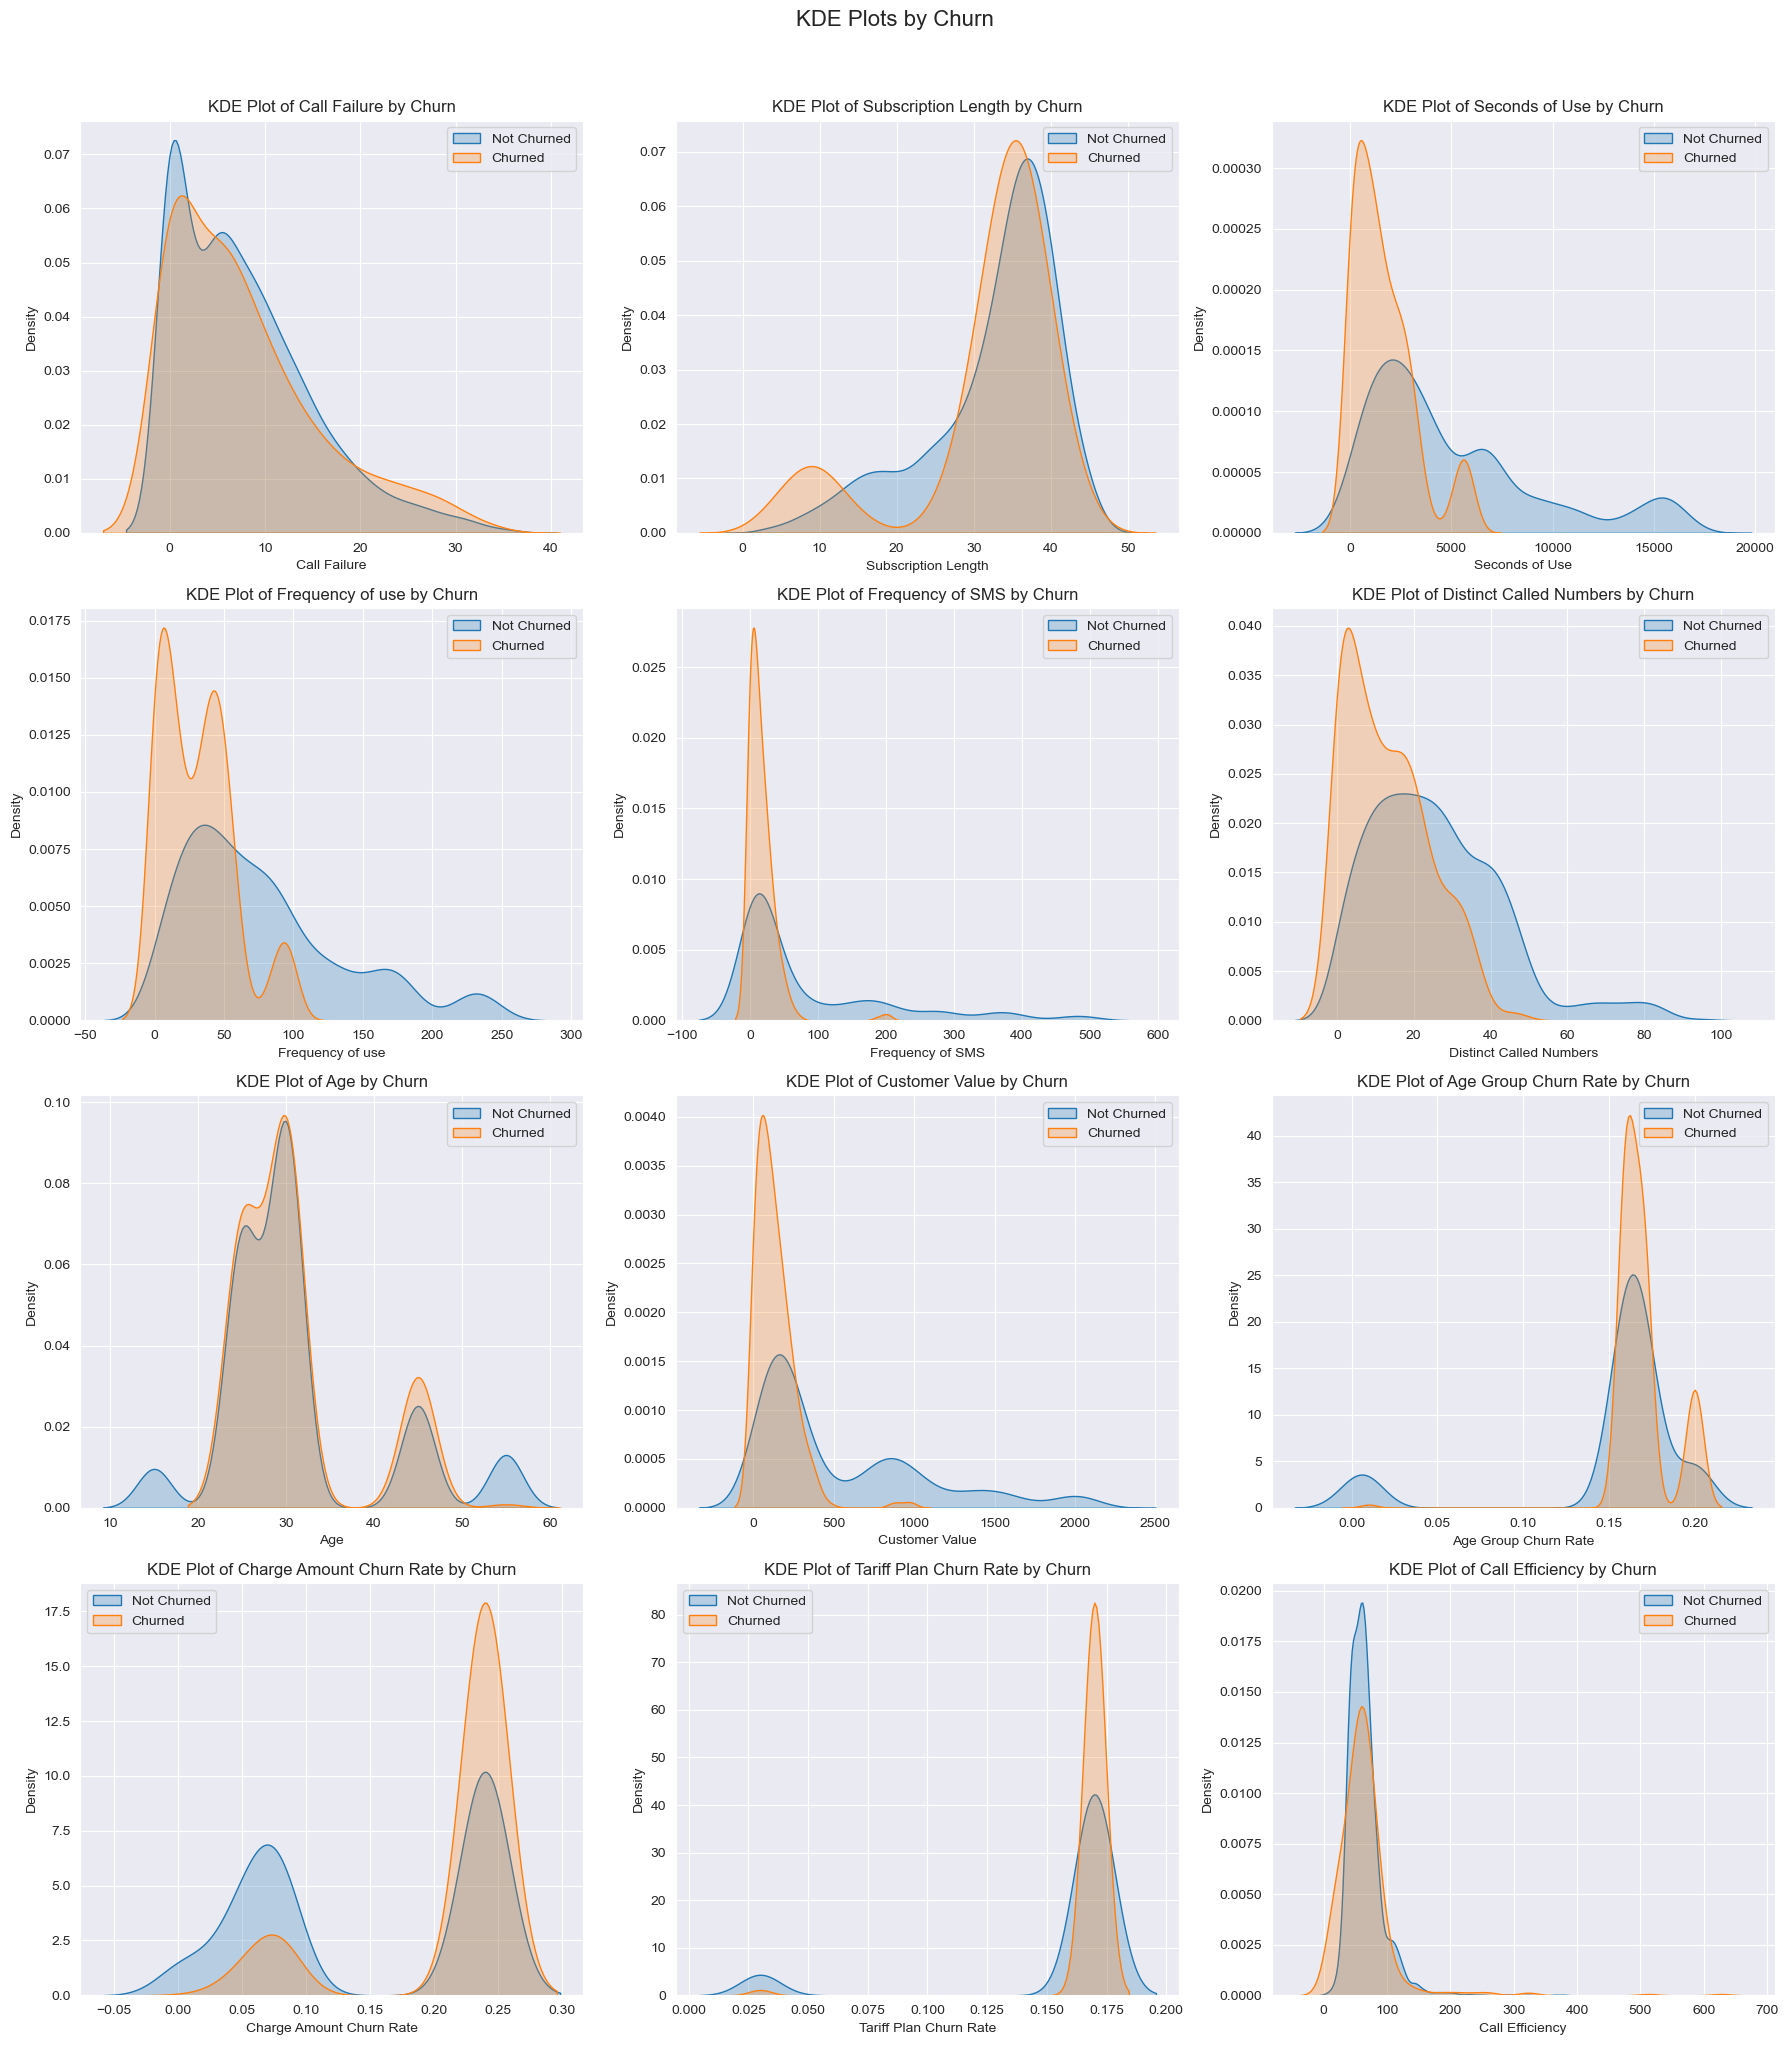

In [69]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create visuals and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('KDE Plots by Churn', y=1.02, fontsize=16)  # Add a title to the figure

# Flatten axes if needed
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = np.array(axes).flatten()

# Loop through each attribute and plot KDE in subplots
for i, var in enumerate(numerical_vars):
    sns.kdeplot(data=feature[feature['Churn'] == 0], x=var, label='Not Churned', fill=True, ax=axes[i])
    sns.kdeplot(data=feature[feature['Churn'] == 1], x=var, label='Churned', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {var} by Churn')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [70]:
skewness = feature[numerical_vars].skew()
print(skewness)

Call Failure                1.067233
Subscription Length        -1.252843
Seconds of Use              1.314737
Frequency of use            1.145862
Frequency of SMS            1.971020
Distinct Called Numbers     1.039277
Age                         1.223952
Customer Value              1.422214
Age Group Churn Rate       -2.438232
Charge Amount Churn Rate   -0.321546
Tariff Plan Churn Rate     -3.089147
Call Efficiency             4.897046
dtype: float64


#### Insight

From kde plot and the .skew() method which quantifies the skewness of each attribute clearly shows only Charge Amount Churn Rate is normally distributed and approximately symmetrically distributed. So Transformation is needed.



___________________________________________________________________________________________________________________________________________________________


#### Next Step : Transformation is needed to Normalize this skewed numerical attributes


##### Table for Suggested Transformations Based on Skewness:

##### | **attribute**                    | **Skewness**   | **Transformation**                                | **Rationale**                                                |
##### |----------------------------------|----------------|---------------------------------------------------|--------------------------------------------------------------|
##### | **Seconds of Use**               | 1.315 (Right)  | Log or Square Root                                 | Reduces the effect of extreme values, normalizes the data.     |
##### | **Frequency of Use**             | 1.146 (Right)  | Log or Square Root                                 | Helps to reduce the skewness and bring data closer to normal.  |
##### | **Frequency of SMS**             | 1.971 (Right)  | Log or Square Root                                 | Reduces the impact of extreme values, normalizes the data.     |
##### | **Distinct Called Numbers**      | 1.039 (Right)  | Log or Square Root                                 | Normalizes the data to reduce skewness.                       |
##### | **Age**                          | 1.224 (Right)  | Log or Square Root                                 | Helps normalize the distribution and reduce skewness.          |
##### | **Customer Value**               | 1.422 (Right)  | Log or Square Root                                 | Reduces skewness and helps with data normalization.            |
##### | **Age Group Churn Rate**         | -2.438 (Left)  | logit                                               | To handle the negative skew (left-skew), a reflection is applied. |
##### | **Charge Amount Churn Rate**     | -0.322 (Symmetric) | No transformation needed                        | Distribution is nearly symmetric.                             |
##### | **Tariff Plan Churn Rate**       | -3.089 (Left)  | Reflect (e.g., Log of negative inverse)            | To handle the left skew, use reflection to transform the data. |
##### | **Call Efficiency**             | 4.8970 (Right)  | Log or Square Root                                 | Helps to reduce the skewness and bring data closer to normal.  |





In [71]:
# its important to note: if the attribute contains negative values, there is need to choose the best reflect approach( for left skewed attributes) 
# transformations like log, boxcox or square root, require non-negative or strictly positive values.
n = feature['Subscription Length'].unique()
n

array([38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 18, 17, 15, 16,  9, 40,
       41, 29, 28, 20, 19, 11, 32, 24, 23, 13, 14,  7, 42, 43, 30, 22, 21,
       12,  5, 44, 45, 10,  3,  6,  8,  4, 46, 47], dtype=int64)

In [ ]:
count = (feature['Age Group Churn Rate'] < -0).sum()
print(count)

In [27]:
# Define the transformations
feature['Call_Failure_log'] = np.log1p(feature['Call Failure'])  # Slight positive skew
feature['Subscription_Length_reflect'] = np.max(feature['Subscription Length']) - feature['Subscription Length']  # Reflect
feature['Subscription_Length_log'] = np.log1p(feature['Subscription_Length_reflect'])  # Reflect + log for negative skew
feature['Seconds_of_Use_log'] = np.log1p(feature['Seconds of Use'])  # Positive skew
feature['Frequency_of_Use_sqrt'] = np.sqrt(feature['Frequency of use'])  # Moderate positive skew
feature['Frequency_of_SMS_log'] = np.log1p(feature['Frequency of SMS'])  # Strong positive skew
feature['Distinct_Called_Numbers_log'] = np.log1p(feature['Distinct Called Numbers'])  # Slight positive skew
feature['Age_sqrt'] = np.sqrt(feature['Age'])  # Moderate positive skew
feature['Customer_Value_log'] = np.log1p(feature['Customer Value'])  # Positive skew
feature['Call_Efficiency_log'] = np.log1p(feature['Call Efficiency']) # strong positve skew

# For Age Group Churn Rate (strong negative skew)
feature['Age_Group_Churn_reflect'] = np.max(feature['Age Group Churn Rate']) - feature['Age Group Churn Rate']  # Reflect
feature['Age_Group_Churn_log'] = np.log1p(feature['Age_Group_Churn_reflect'])  # Reflect + log

# For Tariff Plan Churn Rate (strong negative skew)
feature['Tariff_Plan_Churn_reflect'] = np.max(feature['Tariff Plan Churn Rate']) - feature['Tariff Plan Churn Rate']  # Reflect
feature['Tariff_Plan_Churn_log'] = np.log1p(feature['Tariff_Plan_Churn_reflect'])  # Reflect + log

# No transformation needed for Age Group and Charge Amount Churn Rate

In [28]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Call Failure                 2850 non-null   int64  
 1   Complaints                   2850 non-null   int64  
 2   Subscription Length          2850 non-null   int64  
 3   Charge Amount                2850 non-null   int64  
 4   Seconds of Use               2850 non-null   int64  
 5   Frequency of use             2850 non-null   int64  
 6   Frequency of SMS             2850 non-null   int64  
 7   Distinct Called Numbers      2850 non-null   int64  
 8   Age Group                    2850 non-null   int64  
 9   Tariff Plan                  2850 non-null   int64  
 10  Status                       2850 non-null   int64  
 11  Age                          2850 non-null   int64  
 12  Customer Value               2850 non-null   float64
 13  Churn                  

##### Check again the skewness of this Transformed attributes 

In [29]:
transformed_vars = [
    'Call_Failure_log', 'Subscription_Length_log',
     'Seconds_of_Use_log', 'Frequency_of_Use_sqrt',
    'Frequency_of_SMS_log', 'Distinct_Called_Numbers_log',
    'Age_sqrt', 'Customer_Value_log', 'Age_Group_Churn_log',
    'Tariff_Plan_Churn_log','Call_Efficiency_log'
]
print(feature[transformed_vars].skew())

Call_Failure_log              -0.475646
Subscription_Length_log       -0.165482
Seconds_of_Use_log            -2.792067
Frequency_of_Use_sqrt          0.101230
Frequency_of_SMS_log          -0.220583
Distinct_Called_Numbers_log   -1.214177
Age_sqrt                       0.829932
Customer_Value_log            -1.343970
Age_Group_Churn_log            2.374122
Tariff_Plan_Churn_log          3.089147
Call_Efficiency_log           -0.210347
dtype: float64


*General Insights*:

Many of the attributes are now closer to symmetrical, making them more suitable for modeling.
However, Seconds_of_Use_log, Distinct_Called_Numbers_log, Customer_value_log , Age_Group_Churn_log, and Tariff_Plan_Churn_log remain significantly skewed.id need additional transformations like Box-Cox transformation (for strictly positive values).

 *Observations:*
 
 The skewness values for these certain attributes (e.g., Age Group Churn Rate, Tariff Plan, etc.) 
 remained the same or even became more skewed after applying the log transformation. 
 To address this, we are switching to the Box-Cox transformation for these attributes 
 as it is more effective for reducing skewness in cases where log transformation fails.

#### proceeds to transform using Box-Cox

In [30]:
# List of attributes to update
vars_to_transform = [
    "Seconds of Use",
    "Distinct Called Numbers",
    "Customer Value",
    "Age_Group_Churn_reflect",  #using the reflect because the original attribute is left skewed. and reflect was performed on it.   
    "Tariff_Plan_Churn_reflect",
]



In [31]:
# Check for negative values
for var in vars_to_transform:
    negative_count = (feature[var] < 0).sum()
    if negative_count > 0:
        print(f"{var} contains {negative_count} negative values.")
    else:
        print(f"{var} has no negative values.")

Seconds of Use has no negative values.
Distinct Called Numbers has no negative values.
Customer Value has no negative values.
Age_Group_Churn_reflect has no negative values.
Tariff_Plan_Churn_reflect has no negative values.


In [32]:
# Transform each attribute
for var in vars_to_transform:
    boxcox_var = f"{var}_boxcox"

    # Apply Box-Cox Transformation
    feature[boxcox_var], _ = boxcox(feature[var] +1)  # Small constant to avoid 0
    print(f"Transformed {var} to {boxcox_var} using Box-Cox.")


Transformed Seconds of Use to Seconds of Use_boxcox using Box-Cox.
Transformed Distinct Called Numbers to Distinct Called Numbers_boxcox using Box-Cox.
Transformed Customer Value to Customer Value_boxcox using Box-Cox.
Transformed Age_Group_Churn_reflect to Age_Group_Churn_reflect_boxcox using Box-Cox.
Transformed Tariff_Plan_Churn_reflect to Tariff_Plan_Churn_reflect_boxcox using Box-Cox.


In [33]:
# Recalculate skewness for transformed attributes
boxcox_vars = [f"{var}_boxcox" for var in vars_to_transform]
skewness_after = feature[boxcox_vars].skew()
print("Skewness after Box-Cox transformation:")
print(skewness_after)

Skewness after Box-Cox transformation:
Seconds of Use_boxcox              -0.090346
Distinct Called Numbers_boxcox     -0.068665
Customer Value_boxcox              -0.030441
Age_Group_Churn_reflect_boxcox     -0.011474
Tariff_Plan_Churn_reflect_boxcox    3.089147
dtype: float64


#### Replace transformed attributes as the original attributes 

In [34]:
feature.columns

Index(['Call Failure', 'Complaints', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn', 'Age Group Churn Rate',
       'Charge Amount Churn Rate', 'Tariff Plan Churn Rate', 'Call Efficiency',
       'Call_Failure_log', 'Subscription_Length_reflect',
       'Subscription_Length_log', 'Seconds_of_Use_log',
       'Frequency_of_Use_sqrt', 'Frequency_of_SMS_log',
       'Distinct_Called_Numbers_log', 'Age_sqrt', 'Customer_Value_log',
       'Call_Efficiency_log', 'Age_Group_Churn_reflect', 'Age_Group_Churn_log',
       'Tariff_Plan_Churn_reflect', 'Tariff_Plan_Churn_log',
       'Seconds of Use_boxcox', 'Distinct Called Numbers_boxcox',
       'Customer Value_boxcox', 'Age_Group_Churn_reflect_boxcox',
       'Tariff_Plan_Churn_reflect_boxcox'],
      dtype='object')

In [35]:
# Create a new DataFrame `tdf`- {transformed data frame} with the specified columns from `feature` and rename them
tdf = pd.DataFrame({
    'Call Failure': feature['Call_Failure_log'],
    'Complaints': feature['Complaints'],
    'Subscription Length': feature['Subscription_Length_log'],
    'Charge Amount': feature['Charge Amount'],
    'Seconds of Use': feature['Seconds of Use_boxcox'],
    'Frequency of use': feature['Frequency_of_Use_sqrt'],
    'Frequency of SMS': feature['Frequency_of_SMS_log'],
    'Distinct Called Numbers': feature['Distinct Called Numbers_boxcox'],
    'Age Group': feature['Age Group'],
    'Tariff Plan': feature['Tariff Plan'],
    'Status': feature['Status'],
    'Age': feature['Age_sqrt'],
    'Customer Value': feature['Customer Value_boxcox'],
    'Churn': feature['Churn'],
    'Age Group Churn Rate': feature['Age_Group_Churn_reflect_boxcox'],
    'Charge Amount Churn Rate': feature['Charge Amount Churn Rate'],
    'Tariff Plan Churn Rate': feature['Tariff_Plan_Churn_reflect_boxcox'],
    'Call Efficiency' : feature['Call_Efficiency_log']
})



In [36]:
# confirm the skewness 
skewness = tdf[numerical_vars].skew()
print("Skewness of columns in tdf:")
print(skewness)

Skewness of columns in tdf:
Call Failure               -0.475646
Subscription Length        -0.165482
Seconds of Use             -0.090346
Frequency of use            0.101230
Frequency of SMS           -0.220583
Distinct Called Numbers    -0.068665
Age                         0.829932
Customer Value             -0.030441
Age Group Churn Rate       -0.011474
Charge Amount Churn Rate   -0.321546
Tariff Plan Churn Rate      3.089147
Call Efficiency            -0.210347
dtype: float64


##### Check the new distribution in the numerical attributes

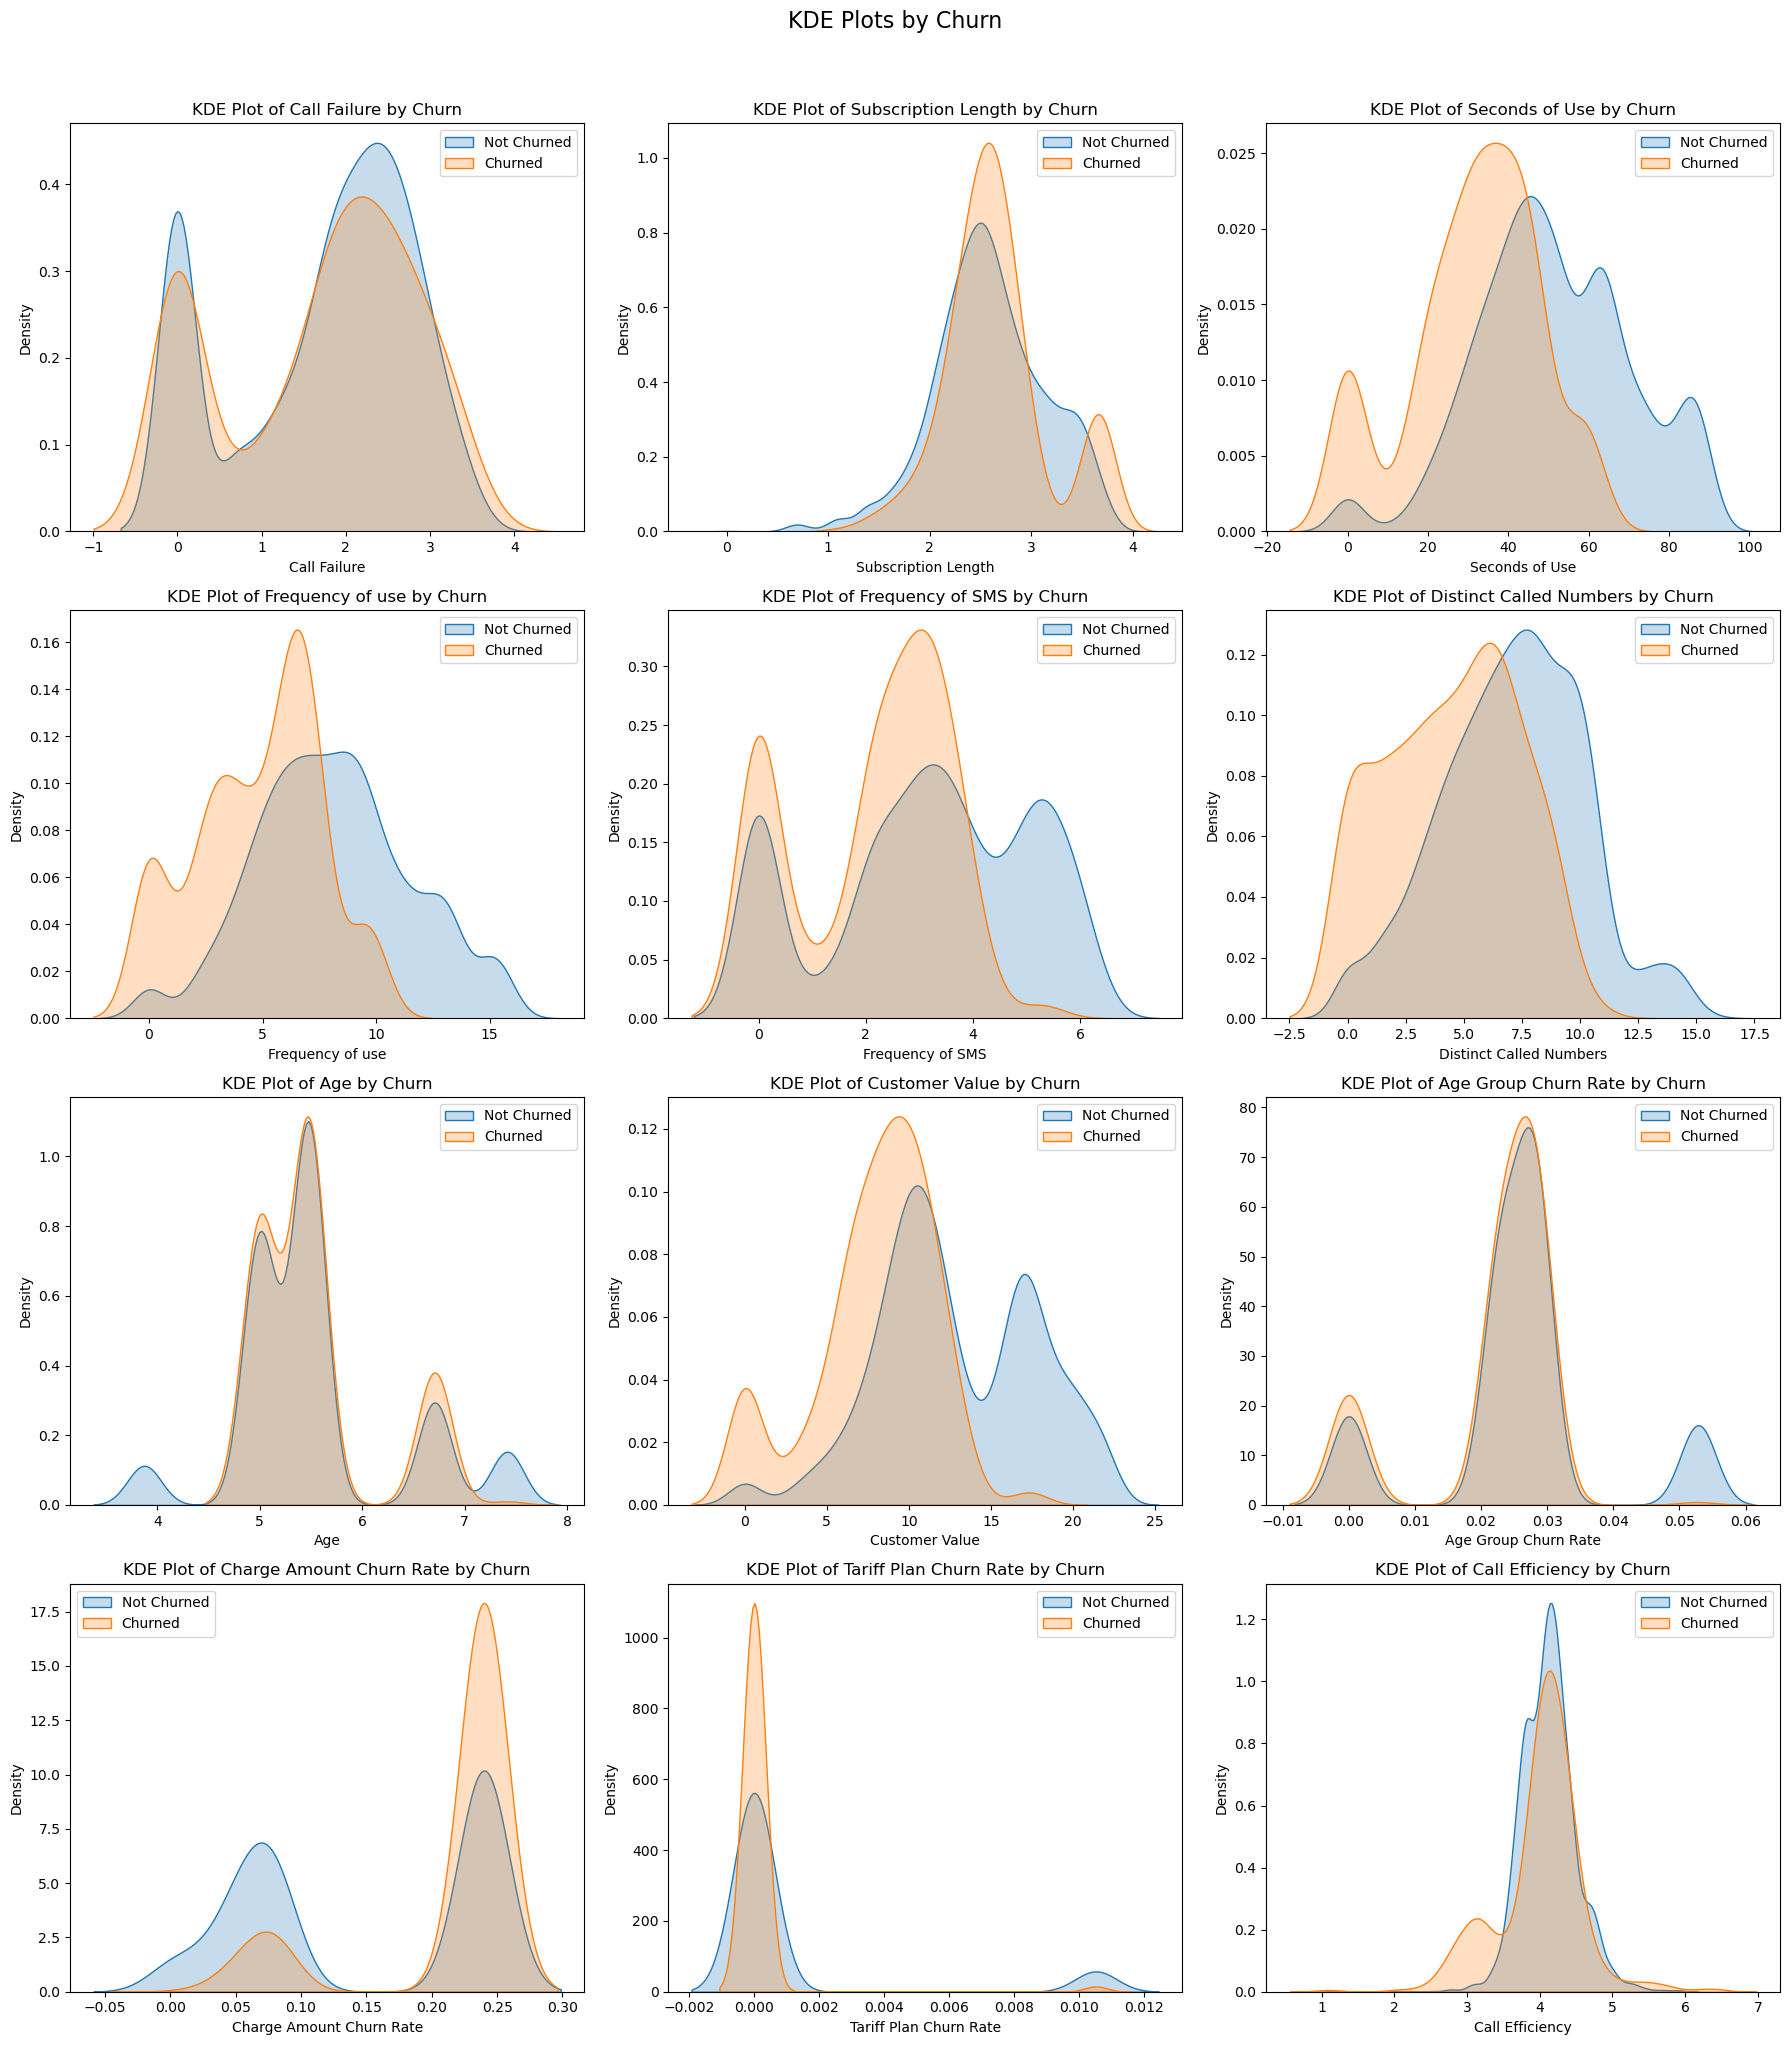

In [37]:
# Extract determinant attributes names as a list
attributes_to_check = tdf.drop(columns=['Churn','Complaints','Charge Amount','Tariff Plan','Status', 'Age Group']).columns.tolist()

# Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(attributes_to_check) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create visuals and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('KDE Plots by Churn', y=1.02, fontsize=16)  # Add a title to the figure

# Flatten axes if needed
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = np.array(axes).flatten()

# Loop through each attribute and plot KDE in subplots
for i, var in enumerate(attributes_to_check):
    sns.kdeplot(data=tdf[tdf['Churn'] == 0], x=var, label='Not Churned', fill=True, ax=axes[i])
    sns.kdeplot(data=tdf[tdf['Churn'] == 1], x=var, label='Churned', fill=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot of {var} by Churn')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Insight:

Tariff plan churn Rate attributes is still highly skewed. Further investigation is to be carried out; Detecting outliers, this could be a huge reason why the attributes are still skewed despite having been transformed.

### 4.3. Statistical Tests to Analysis Factors Relationships/ correlation to Churn

we need to explore how each variable relates to the likelihood of churn (the target variable). Here’s the breakdown:

1. Numerical Variables: Are there significant differences in the means of numerical features between churn and non-churn customers?

2. Categorical Variables: Do churn and non-churn customers differ significantly in categorical features?

In [38]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Failure              2850 non-null   float64
 1   Complaints                2850 non-null   int64  
 2   Subscription Length       2850 non-null   float64
 3   Charge Amount             2850 non-null   int64  
 4   Seconds of Use            2850 non-null   float64
 5   Frequency of use          2850 non-null   float64
 6   Frequency of SMS          2850 non-null   float64
 7   Distinct Called Numbers   2850 non-null   float64
 8   Age Group                 2850 non-null   int64  
 9   Tariff Plan               2850 non-null   int64  
 10  Status                    2850 non-null   int64  
 11  Age                       2850 non-null   float64
 12  Customer Value            2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Age Group Chu

In [39]:
# Check for NaN values in 'Call Efficiency'
print(tdf['Call Efficiency'].isna().sum())  # Count the NaN values

107


In [40]:
# Fill NaN values with the mean (or median) of the column
tdf['Call Efficiency'] = tdf['Call Efficiency'].fillna(tdf['Call Efficiency'].mean())
tdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Failure              2850 non-null   float64
 1   Complaints                2850 non-null   int64  
 2   Subscription Length       2850 non-null   float64
 3   Charge Amount             2850 non-null   int64  
 4   Seconds of Use            2850 non-null   float64
 5   Frequency of use          2850 non-null   float64
 6   Frequency of SMS          2850 non-null   float64
 7   Distinct Called Numbers   2850 non-null   float64
 8   Age Group                 2850 non-null   int64  
 9   Tariff Plan               2850 non-null   int64  
 10  Status                    2850 non-null   int64  
 11  Age                       2850 non-null   float64
 12  Customer Value            2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Age Group Chu

In [41]:
# List of variables to test against Churn
variables = [
    'Call Failure', 'Complaints', 'Subscription Length', 'Charge Amount',
    'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
    'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
    'Age', 'Customer Value','Call Efficiency'
]


In [42]:
results = []

In [43]:
for var in variables:
    # Chi-Square Test for Categorical variables
    # This test is used for variables that are categorical (binary or nominal) like 'Complaints', 'Tariff Plan', 'Status', and 'Age Group'.
    # It tests whether there's a significant association between the categorical variable and the churn status.
    if var in ['Complaints', 'Tariff Plan', 'Status', 'Age Group']:
        contingency_table = pd.crosstab(tdf[var], tdf['Churn'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({
            'Variable': var,
            'Test': 'Chi-Square',
            'Statistic': round(chi2, 2),
            'p-value': round(p, 6)
        })

    # T-test for continuous variables with normally distributed data
    # The T-test (Welch’s version here) is used for normally distributed continuous variables, 
    # comparing the means of two independent groups (Churn vs Non-Churn).
    # Variables like 'Call Failure', 'Seconds of Use', 'Frequency of use', etc., are continuous and normally distributed(after Transformation).
    elif var in ['Call Failure', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value', 'Subscription Length','Call Efficiency']:
        group_0 = tdf[tdf['Churn'] == 0][var]  # Non-churned group
        group_1 = tdf[tdf['Churn'] == 1][var]  # Churned group
        stat, p = ttest_ind(group_0, group_1, equal_var=False)  # Welch's T-test (does not assume equal variance)
        results.append({
            'Variable': var,
            'Test': 'T-test',
            'Statistic': round(stat, 2),
            'p-value': round(p, 10)
        })

    # Mann-Whitney U Test for Ordinal variables (Charge Amount)
    # The Mann-Whitney U test is used for ordinal variables or continuous variables that are not normally distributed.
    # 'Charge Amount' is ordinal, with values ranging from 0 to 9, and hence we use the Mann-Whitney U test to compare the two groups.
    elif var == 'Charge Amount':
        group_0 = tdf[tdf['Churn'] == 0][var]  # Non-churned group
        group_1 = tdf[tdf['Churn'] == 1][var]  # Churned group
        stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
        results.append({
            'Variable': var,
            'Test': 'Mann-Whitney U',
            'Statistic': round(stat, 2),
            'p-value': round(p, 6)
        })

# Convert results to DataFrame for readability
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                   Variable            Test  Statistic   p-value
0              Call Failure          T-test       0.90  0.366083
1                Complaints      Chi-Square     844.29  0.000000
2       Subscription Length          T-test      -2.39  0.017276
3             Charge Amount  Mann-Whitney U  727431.00  0.000000
4            Seconds of Use          T-test      23.08  0.000000
5          Frequency of use          T-test      22.54  0.000000
6          Frequency of SMS          T-test      13.61  0.000000
7   Distinct Called Numbers          T-test      17.81  0.000000
8                 Age Group      Chi-Square      52.44  0.000000
9               Tariff Plan      Chi-Square      30.96  0.000000
10                   Status      Chi-Square     689.14  0.000000
11                      Age          T-test       0.04  0.968273
12           Customer Value          T-test      24.44  0.000000
13          Call Efficiency          T-test       3.87  0.000122


 #### Insights:

1. Highly Significant Factors Influencing Churn:

        Complaints, Seconds of Use, Frequency of Use, Frequency of SMS, Distinct Called Numbers, Customer Value, Tariff  Plan and Call Efficiency have a significant impact on churn. These variables should be prioritized in any churn prediction models or retention strategies to improve customer retention and minimize churn.

2. Non-significant Factors:

        Call Failure, and Age, appear to have weaker relationships with churn based on the current dataset.




3. Summary of Key Insights from Factors :

        Call Failure (T-test, p = 0.366083):
        
        Interpretation: The p-value is greater than 0.05, indicating that there is no statistically significant difference between churned and non-churned customers based on the "Call Failure" variable. It suggests that this variable may not be a strong predictor of churn.
        
        Complaints (Chi-Square, p = 0.000000):
        
        Interpretation: The p-value is extremely small, indicating a highly significant relationship between the number of complaints and churn. This suggests that complaints are strongly associated with whether a customer churns or not, making it an important factor to consider for customer retention strategies.
        
        Subscription Length (T-test, p = 0.017276):
        
        Interpretation: The p-value is less than 0.05, indicating that there is a statistically significant difference in subscription length between churned and non-churned customers. This implies that the duration of the subscription is a meaningful factor in predicting churn.
        
        Charge Amount (Mann-Whitney U, p = 0.000000):
        
        Interpretation: The p-value is very small, suggesting a significant difference in charge amounts between churned and non-churned customers. This indicates that charge amounts play a role in churn behavior, and analyzing pricing strategies could be valuable in reducing churn.
        

        Seconds of Use (T-test, p = 0.000000):
        
        Interpretation: The p-value is extremely small, indicating a highly significant difference in seconds of use between churned and non-churned customers. Higher usage tends to correlate with retention, meaning customers who use the service more are less likely to churn.
         
        
        Frequency of Use (T-test, p = 0.000000):
        
        Interpretation: The p-value is very small, showing a significant difference between churned and non-churned customers based on the frequency of use. Frequent usage could indicate higher customer engagement, which is likely linked to retention.
         
        
        Frequency of SMS (T-test, p = 0.000000):
        
        Interpretation: This result also shows a very small p-value, meaning that the frequency of SMS use significantly differentiates churned from non-churned customers. High engagement with SMS services could suggest a customer’s likelihood to stay with the service.
        
        
        Distinct Called Numbers (T-test, p = 0.000000):
        
        Interpretation: The p-value is extremely small, suggesting that the number of distinct called numbers is a strong predictor of churn. This might indicate that customers who use the service to call a variety of numbers tend to stay longer, whereas those who make fewer calls may churn.
        
        
        Age Group (Chi-Square, p = 0.000000):
        
        Interpretation: The significant p-value suggests that age group plays an important role in predicting churn. Different age groups might exhibit different churn behaviors, which can help in targeted retention strategies.
         
        
        Tariff Plan (Chi-Square, p = 0.000000):
        
        Interpretation: A significant result here shows that the type of tariff plan is highly associated with churn. This suggests that certain tariff plans might lead to higher churn, possibly due to pricing or perceived value.
         
        
        Status (Chi-Square, p = 0.000000):
        
        Interpretation: This result indicates that customer status (e.g., active or inactive) is highly correlated with churn. Understanding how the status of a customer affects retention could be key to reducing churn.
         
        
        Age (T-test, p = 0.968273):
        
        Interpretation: The p-value is high, suggesting no significant difference between churned and non-churned customers based on age. Age may not be a strong predictor of churn in this case.
         
        
        Customer Value (T-test, p = 0.000000):
        
        Interpretation: The very small p-value suggests a significant difference in customer value between churned and non-churned customers. Higher customer value likely correlates with retention, and this is a critical factor to track in customer segmentation.
         
        
        Call Efficiency (T-test, p = 0.000122):
        
        Interpretation: The p-value is very small, indicating a significant difference in call efficiency between churned and non-churned customers. Customers with higher call efficiency might be more engaged or satisfied, contributing to retention.

4. Actionable Insights for Retention Strategies:

        Complaint Management: Addressing and resolving customer complaints proactively can directly impact churn reduction.
        
        Targeted Retention: Create offers for customers nearing subscription expiration and prioritize high-CLV customers.
    
        Boosting Engagement: Strategies to increase the total usage time, frequency of usage, and frequency of SMS could make customers more engaged, reducing the likelihood of churn.
    
        Customer Value Maximization: Focusing on enhancing customer value through personalized offers and improving the customer experience can contribute significantly to reducing churn.
    
        Call Efficiency Improvement: Understanding and optimizing call efficiency can lead to enhanced service quality and customer satisfaction, which directly correlates with reduced churn rates.


In [44]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2850 entries, 0 to 3131
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call Failure              2850 non-null   float64
 1   Complaints                2850 non-null   int64  
 2   Subscription Length       2850 non-null   float64
 3   Charge Amount             2850 non-null   int64  
 4   Seconds of Use            2850 non-null   float64
 5   Frequency of use          2850 non-null   float64
 6   Frequency of SMS          2850 non-null   float64
 7   Distinct Called Numbers   2850 non-null   float64
 8   Age Group                 2850 non-null   int64  
 9   Tariff Plan               2850 non-null   int64  
 10  Status                    2850 non-null   int64  
 11  Age                       2850 non-null   float64
 12  Customer Value            2850 non-null   float64
 13  Churn                     2850 non-null   int64  
 14  Age Group Chu

### 4.4. Outliers Detection

 Outliers can pull the distribution in one direction, causing skewness.


 Outliers may indicate data entry errors, measurement errors, or rare but valid events

In [45]:
# Detect outliers using IQR
for attribute in attributes_to_check:
    Q1 = tdf[attribute].quantile(0.25)
    Q3 = tdf[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = tdf[(tdf[attribute] < lower_bound) | (tdf[attribute] > upper_bound)]
    print(f"{attribute}: {len(outliers)} outliers detected")

Call Failure: 0 outliers detected
Subscription Length: 37 outliers detected
Seconds of Use: 0 outliers detected
Frequency of use: 0 outliers detected
Frequency of SMS: 0 outliers detected
Distinct Called Numbers: 2 outliers detected
Age: 633 outliers detected
Customer Value: 0 outliers detected
Age Group Churn Rate: 633 outliers detected
Charge Amount Churn Rate: 0 outliers detected
Tariff Plan Churn Rate: 229 outliers detected
Call Efficiency: 128 outliers detected


#### Visualize Outliers : using the not transformed attributes in features. why? To examine the outliers whicch is better done from the original datasets.

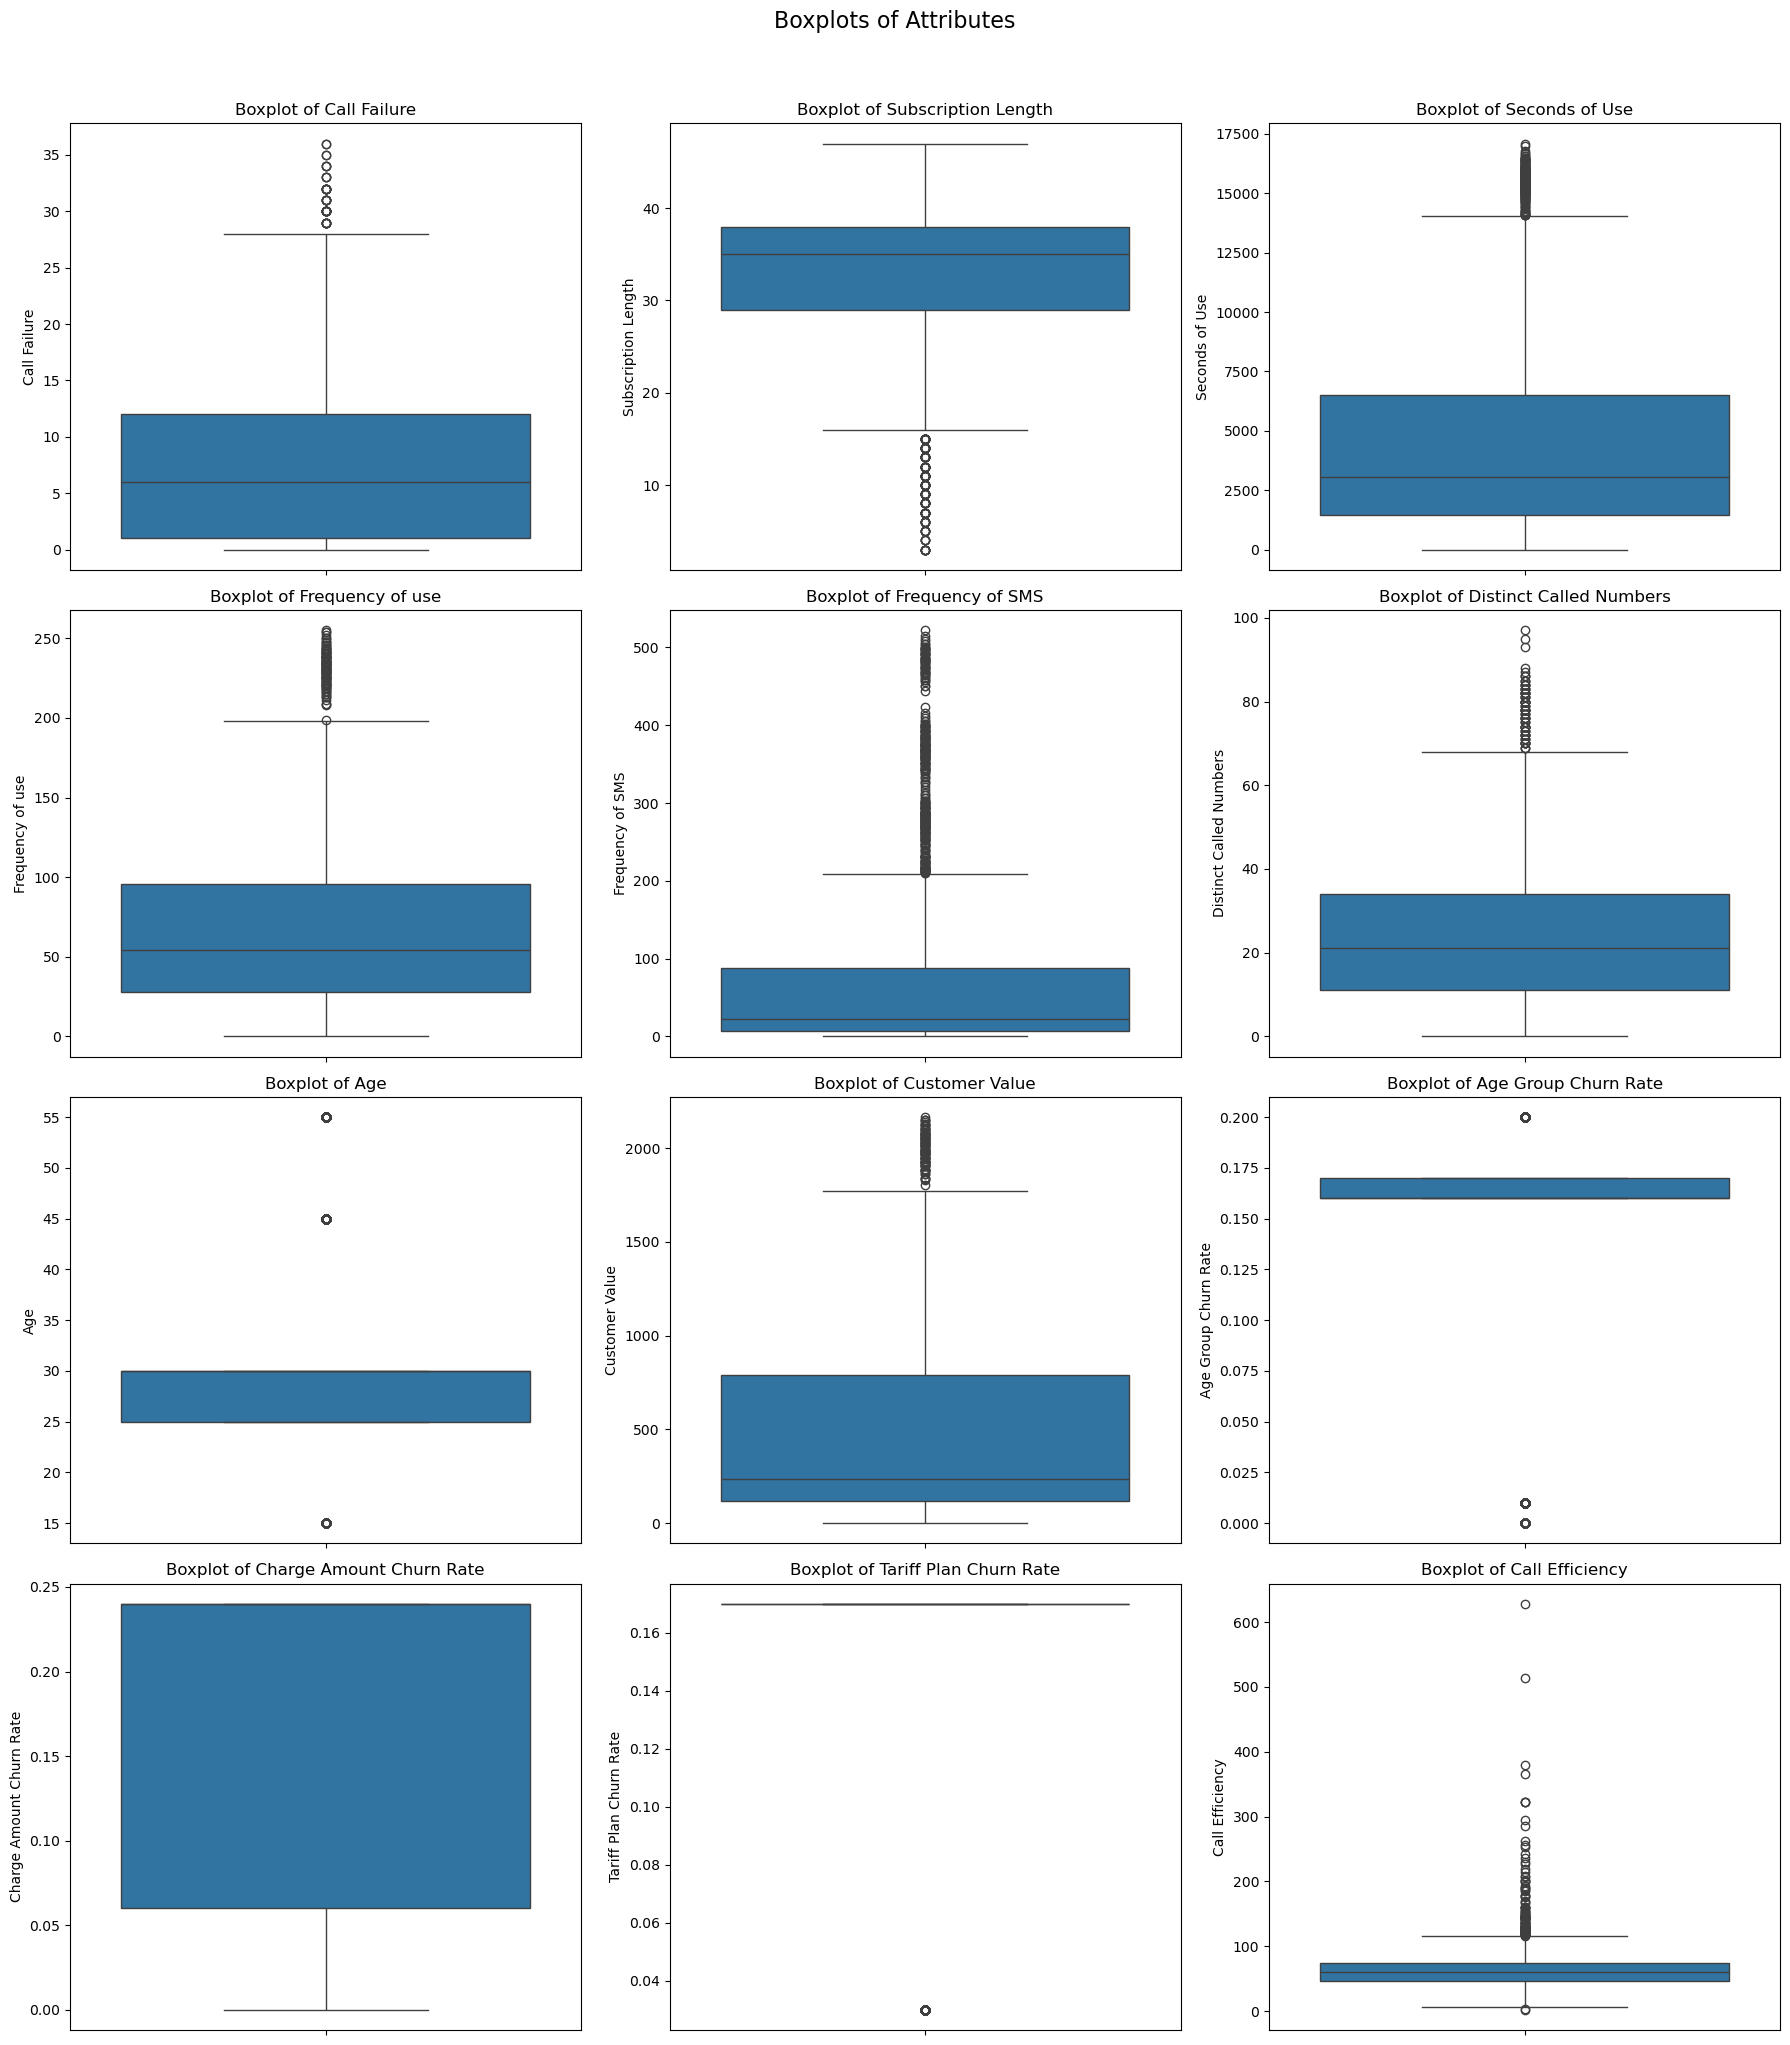

In [46]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(attributes_to_check) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create visuals and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
fig.suptitle('Boxplots of Attributes', y=1.02, fontsize=16)  # Add a title to the figure

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each attribute and plot boxplots in subplots.
for i, var in enumerate(attributes_to_check):
    sns.boxplot(data=feature, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

# Hide any empty subplots
for j in range(len(attributes_to_check), len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

The outliers are important to the business, so I won’t be removing them. Instead, I’ll handle them using Robust Scaling to transform the data features.  

Two models:  
1. **Logistic Regression**:  
   - Sensitive to feature scaling because it optimizes the cost function based on feature values.  
   - RobustScaler ensures that outliers don’t skew the feature scaling, which improves model stability and overall performance.  

2. **XGBoost**:  
   - While XGBoost doesn’t require feature scaling since it is tree-based and handles raw data well, applying Robust Scaling can still enhance its performance.  
   - Scaling can help in scenarios where features have vastly different magnitudes, making the training process more efficient and stable.  
